In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
mainDF = pd.read_csv('rawData.csv')
mainDF

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore,homePosition,homePercentage,awayPosition,awayPercentage
0,2012R0101,2012,1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,"38,203",...,Sydney,4.1,8.40,13.80,14.16,100,18.0,37.0,1.0,270.3
1,2012R0102,2012,1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,"78,285",...,Carlton,3.2,8.70,11.13,18.17,125,15.0,64.8,4.0,154.3
2,2012R0103,2012,1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,"78,466",...,Collingwood,2.7,7.90,12.16,16.19,115,6.0,119.1,13.0,83.9
3,2012R0104,2012,1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,"33,473",...,Brisbane Lions,1.4,7.80,13.13,17.17,119,14.0,65.5,5.0,152.6
4,2012R0105,2012,1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,"12,790",...,Adelaide,7.8,11.10,15.16,19.23,137,17.0,49.6,2.0,201.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2023SF01,2023,-1,2023-09-15,24.5,14.4,0.0,M.C.G.,7:50 PM,"96,412",...,Carlton,2.2,5.30,7.50,11.70,73,NaN,NaN,NaN,NaN
2443,2023SF02,2023,-1,2023-09-16,24.0,7.6,0.0,Adelaide Oval,7:10 PM,"45,520",...,Greater Western Sydney,4.4,9.11,11.15,13.15,93,NaN,NaN,NaN,NaN
2444,2023PF01,2023,-1,2023-09-22,15.3,5.7,0.0,M.C.G.,7:50 PM,"97,665",...,Greater Western Sydney,0.3,4.40,6.90,8.90,57,NaN,NaN,NaN,NaN
2445,2023PF02,2023,-1,2023-09-23,24.1,14.2,0.0,Gabba,5:15 PM,"36,012",...,Carlton,5.1,6.30,6.70,9.90,63,NaN,NaN,NaN,NaN


In [ ]:
print(type(mainDF['Attendance'].min()))
mainDF['Attendance'] = mainDF['Attendance'].str.replace(',', '', regex=True)  # Remove commas
mainDF['Attendance'] = pd.to_numeric(mainDF['Attendance'], errors='coerce') 

In [ ]:
mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\games.csv')
mainDF.head()

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
0,2012R0101,2012,R1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,"38,203",...,3.3,3.4,5.70,37,Sydney,4.1,8.4,13.80,14.16,100
1,2012R0102,2012,R1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,"78,285",...,5.6,10.7,12.90,81,Carlton,3.2,8.7,11.13,18.17,125
2,2012R0103,2012,R1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,"78,466",...,10.6,14.1,20.17,137,Collingwood,2.7,7.9,12.16,16.19,115
3,2012R0104,2012,R1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,"33,473",...,7.4,8.8,11.12,78,Brisbane Lions,1.4,7.8,13.13,17.17,119
4,2012R0105,2012,R1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,"12,790",...,5.3,8.6,10.80,68,Adelaide,7.8,11.1,15.16,19.23,137


C:\Users\raadr\AppData\Local\Temp\ipykernel_54332\1797856413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['HomeTeam'], y=mainDF['Attendance'], palette='pastel')


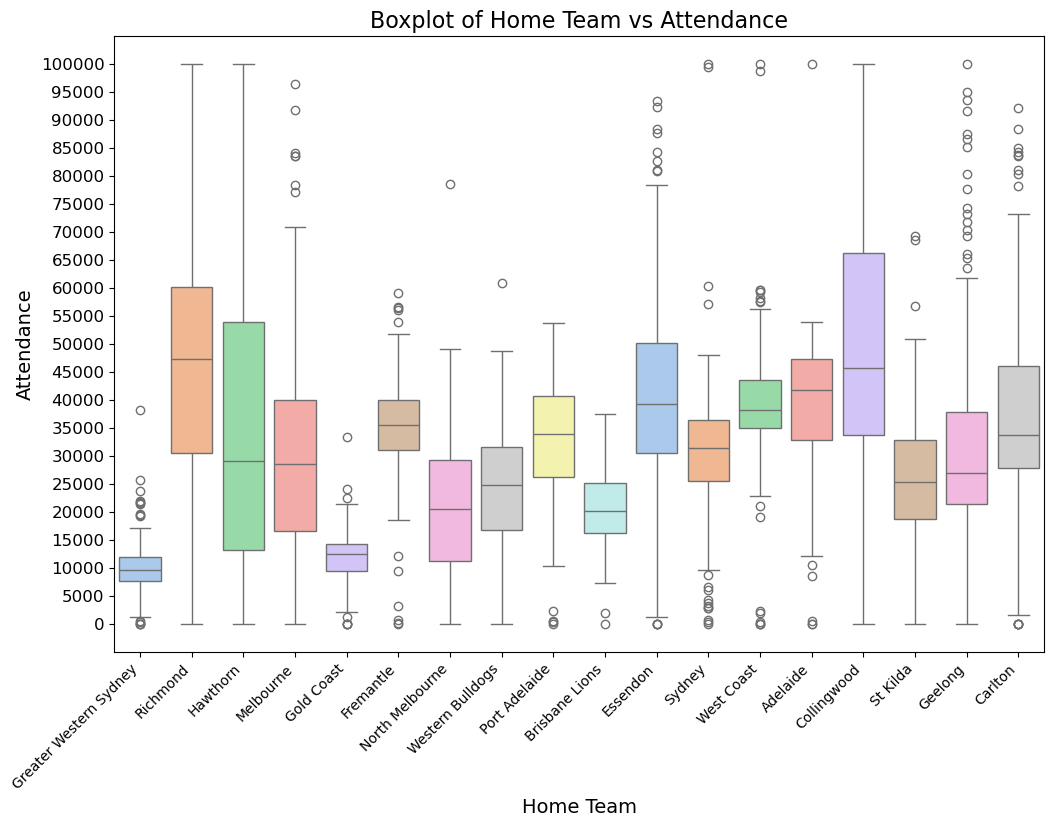

In [59]:

# Boxplot of Home Team vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['HomeTeam'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Home Team vs Attendance', fontsize=16)
plt.xlabel('Home Team', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_54332\2645365776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')


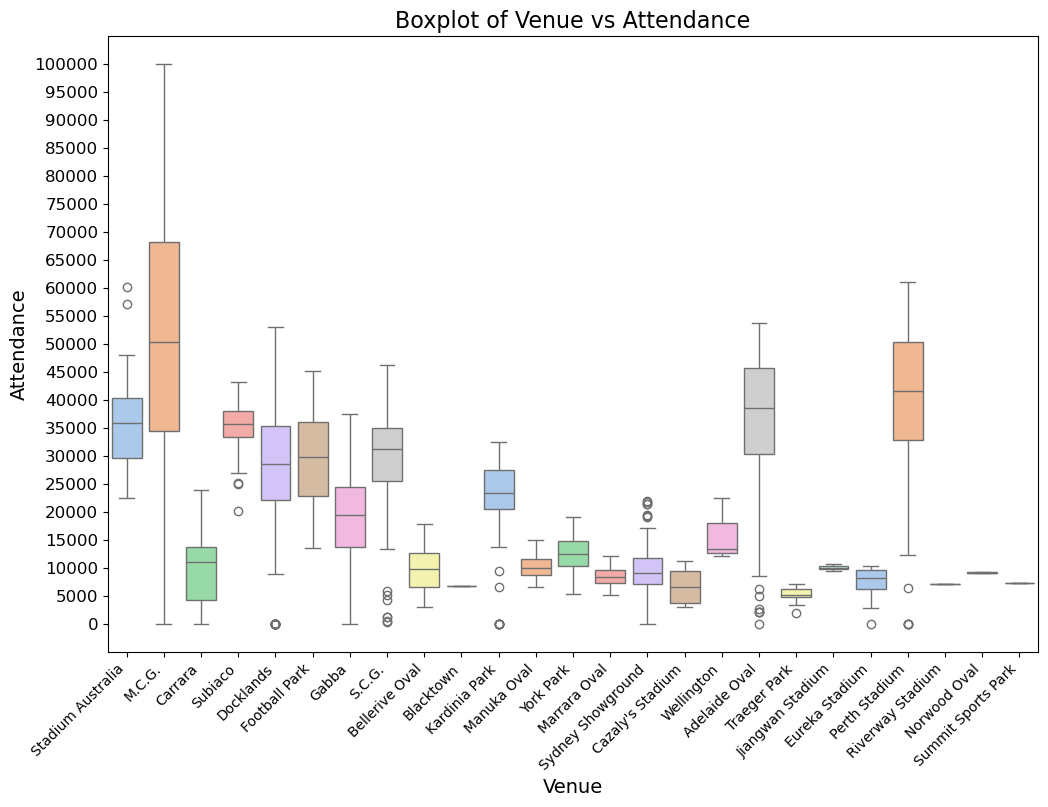

In [61]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Venue vs Attendance', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_54332\1791214198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')


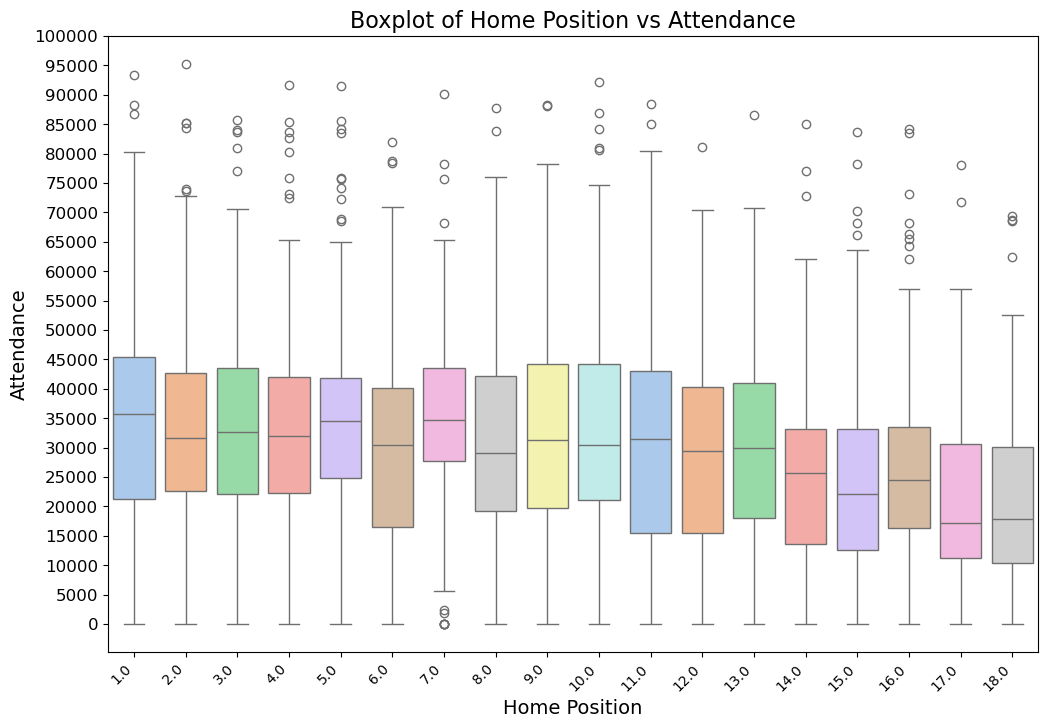

In [62]:
# Boxplot of Home Position vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Home Position vs Attendance', fontsize=16)
plt.xlabel('Home Position', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()

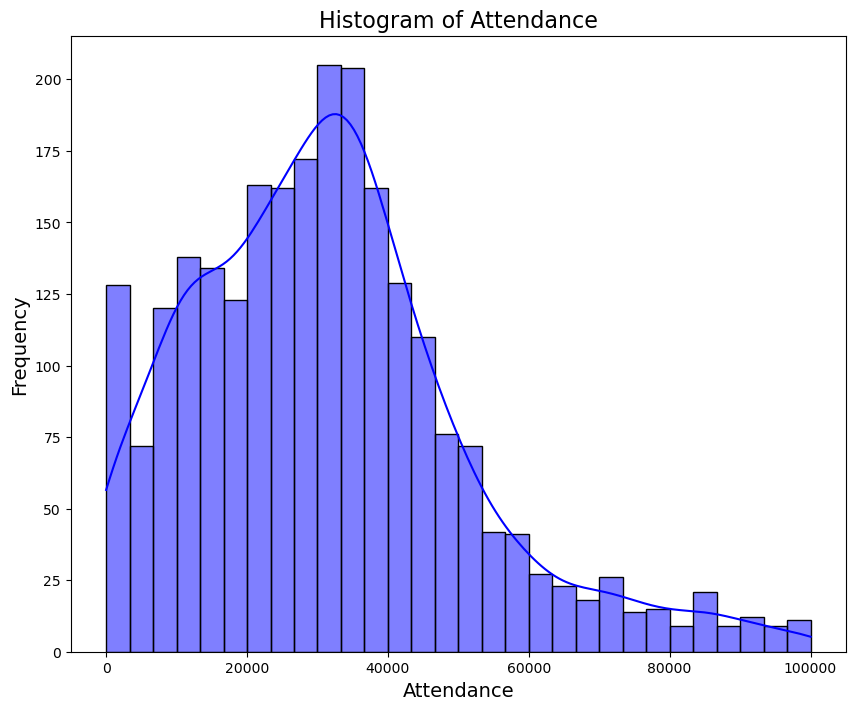

In [72]:
plt.figure(figsize=(10, 8))
sns.histplot(mainDF['Attendance'], bins=30, kde=True, color='blue')

plt.title('Histogram of Attendance', fontsize=16)
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

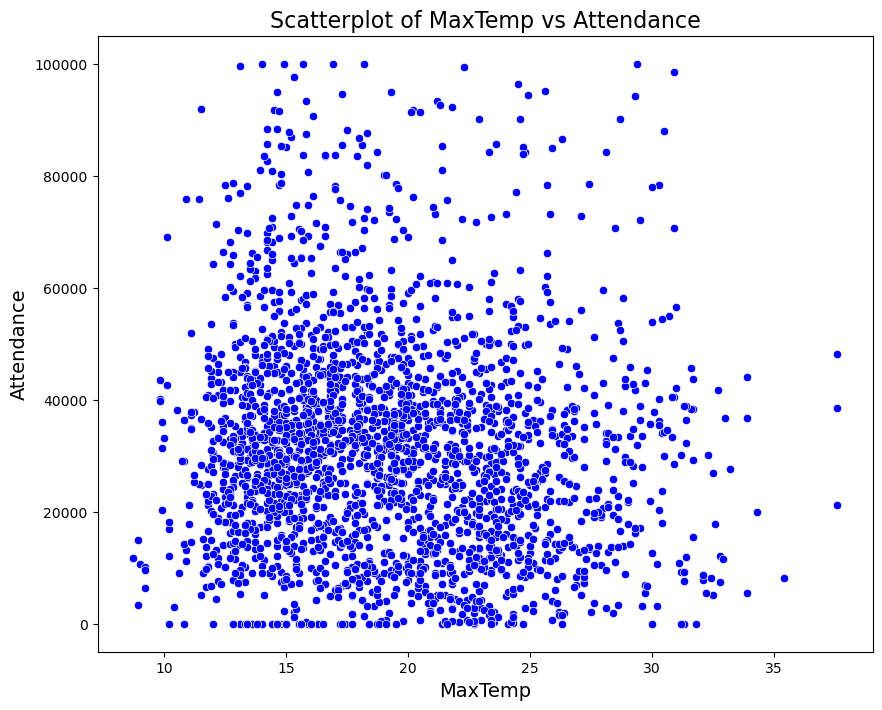

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = mainDF, x='MaxTemp', y='Attendance', color='blue')

plt.title('Scatterplot of MaxTemp vs Attendance', fontsize=16)
plt.xlabel('MaxTemp', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.show()

In [ ]:
#Rainfall